In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

In [2]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
len(flags)

274

In [30]:
gold = cv2.imread('gold.jpg')



#Adding in ultramarine

In [17]:
ultra = cv2.imread('ultra_test.png')

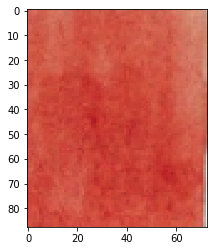

In [5]:
plt.imshow(ultra);

In [6]:
ultra

array([[[188, 100,  90],
        [198, 102,  86],
        [210, 109,  92],
        ...,
        [201, 145, 128],
        [205, 156, 139],
        [221, 186, 174]],

       [[197,  98,  86],
        [206, 102,  87],
        [211, 103,  88],
        ...,
        [209, 145, 124],
        [203, 144, 123],
        [210, 165, 148]],

       [[200,  99,  82],
        [204,  96,  80],
        [214, 103,  88],
        ...,
        [206, 141, 118],
        [201, 140, 118],
        [206, 157, 138]],

       ...,

       [[212,  81,  68],
        [211,  80,  64],
        [209,  79,  63],
        ...,
        [191, 102,  92],
        [212, 167, 161],
        [249, 244, 242]],

       [[214,  87,  72],
        [214,  81,  67],
        [207,  74,  62],
        ...,
        [185, 101,  90],
        [200, 160, 154],
        [245, 244, 241]],

       [[201,  80,  68],
        [209,  76,  65],
        [205,  71,  61],
        ...,
        [181, 102,  92],
        [192, 156, 149],
        [245, 245, 243]]

In [38]:
gold_lab = cv2.cvtColor(gold, cv2.COLOR_BGR2HSV)

In [42]:
lab_ultra2

array([[[116, 149,  80],
        [118, 150,  76],
        [126, 151,  74],
        ...,
        [155, 136,  97],
        [165, 133, 101],
        [193, 131, 109]],

       [[116, 152,  75],
        [120, 153,  72],
        [121, 154,  70],
        ...,
        [156, 137,  93],
        [154, 135,  95],
        [173, 132, 103]],

       [[116, 152,  73],
        [115, 155,  70],
        [122, 155,  69],
        ...,
        [151, 137,  92],
        [150, 136,  94],
        [166, 133, 101]],

       ...,

       [[105, 165,  59],
        [103, 165,  59],
        [102, 165,  59],
        ...,
        [118, 149,  80],
        [177, 136, 104],
        [245, 128, 125]],

       [[109, 163,  61],
        [105, 166,  58],
        [ 99, 167,  58],
        ...,
        [116, 148,  82],
        [170, 134, 107],
        [245, 127, 127]],

       [[102, 162,  64],
        [101, 167,  58],
        [ 96, 168,  58],
        ...,
        [117, 146,  85],
        [166, 133, 109],
        [246, 127, 128]]

In [32]:
pixel_colors = gold.reshape((np.shape(gold)[0]*np.shape(gold)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

In [16]:
lab_ultra = cv2.cvtColor(lab_ultra2, cv2.COLOR_BGR2RLAB)

NameError: name 'lab_ultra2' is not defined

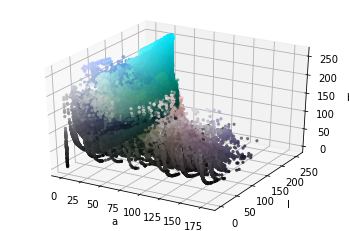

In [40]:
l, a, b, = cv2.split(gold_lab)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(l.flatten(), a.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("a")
axis.set_ylabel("l")
axis.set_zlabel("b")
plt.show()

In [40]:
l.mean()

116.76229763387298

In [37]:
l.std()

1.3933678350914298

In [48]:
ultra_means = lab_ultra2.mean(axis=0)

In [49]:
ultra_means

array([[105.96590909, 157.375     ,  68.125     ],
       [104.96590909, 160.81818182,  63.64772727],
       [105.28409091, 161.5       ,  62.68181818],
       [104.48863636, 162.11363636,  61.94318182],
       [103.05681818, 162.88636364,  61.34090909],
       [101.54545455, 163.40909091,  61.03409091],
       [100.29545455, 163.70454545,  60.94318182],
       [101.47727273, 163.42045455,  61.06818182],
       [102.82954545, 163.02272727,  61.36363636],
       [104.18181818, 162.30681818,  62.07954545],
       [105.30681818, 161.53409091,  62.75      ],
       [105.47727273, 161.45454545,  62.875     ],
       [106.19318182, 161.75      ,  62.43181818],
       [103.03409091, 162.93181818,  61.77272727],
       [102.09090909, 163.53409091,  61.23863636],
       [101.42045455, 163.625     ,  61.18181818],
       [102.59090909, 163.54545455,  61.21590909],
       [102.76136364, 163.47727273,  61.375     ],
       [101.89772727, 164.06818182,  60.84090909],
       [100.07954545, 164.89772

In [53]:
import pandas as pd
ultra_df = pd.DataFrame(ultra_means, columns=['h','s','v'])

In [54]:
ultra_df

,h,s,v
0,105.965909,157.375000,68.125000
1,104.965909,160.818182,63.647727
2,105.284091,161.500000,62.681818
3,104.488636,162.113636,61.943182
4,103.056818,162.886364,61.340909
...,...,...,...
68,122.704545,152.522727,71.988636
69,123.852273,151.272727,73.670455
70,120.988636,148.465909,77.920455
71,137.352273,142.806818,86.965909


In [55]:
empty = pd.DataFrame()

In [57]:
empty.append(ultra_df)

,h,s,v
0,105.965909,157.375000,68.125000
1,104.965909,160.818182,63.647727
2,105.284091,161.500000,62.681818
3,104.488636,162.113636,61.943182
4,103.056818,162.886364,61.340909
...,...,...,...
68,122.704545,152.522727,71.988636
69,123.852273,151.272727,73.670455
70,120.988636,148.465909,77.920455
71,137.352273,142.806818,86.965909


In [13]:

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=30, random_state=42)
labels = kmeans.fit_predict(h)
#image2show = kmeans.cluster_centers_[kmeans.labels_]

NameError: name 'h' is not defined

In [343]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(h,labels)

In [344]:
print(silhouette_avg)

0.17029788185996528


In [147]:
sample_sil = silhouette_samples(h,labels)

In [148]:
sample_sil

array([ 5.10487042e-01,  6.18069275e-01,  6.00653449e-01,  6.14118318e-01,
        6.12593769e-01,  0.00000000e+00,  3.43732703e-02,  5.31402427e-02,
        3.78565140e-02,  2.96089822e-02,  3.56008658e-02,  4.08394357e-02,
        1.55876098e-02,  2.61297960e-01,  2.80413433e-01,  2.77565581e-01,
        2.49029903e-01,  2.17827204e-01,  2.59794461e-01,  2.31818635e-01,
        1.58078564e-01,  2.02323997e-01,  1.93509141e-01,  1.95180896e-01,
        1.94116141e-01,  1.42440270e-01,  2.02272496e-01,  6.10757040e-02,
        8.47008697e-02,  7.80403941e-02,  5.10685988e-02,  4.72099650e-02,
       -2.35363663e-02,  1.18610219e-02,  2.05402200e-02,  5.57466327e-02,
        8.23750539e-02,  9.48312403e-02,  5.46509775e-02,  6.49833628e-02,
        4.30311186e-02,  8.02256882e-02,  2.00841626e-02,  7.40229420e-02,
        6.17600749e-02,  6.57107358e-02,  6.57680200e-02,  6.16529607e-02,
        4.28886747e-02,  6.51163736e-02,  2.73831159e-01,  2.89146860e-01,
        2.37865607e-01,  

TypeError: Invalid shape (269,) for image data

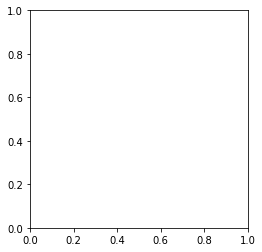

In [349]:
plt.imshow(predict)


In [91]:
image2show.shape

(269, 1101)

In [346]:
predict = kmeans.predict(h)

KeyboardInterrupt: 

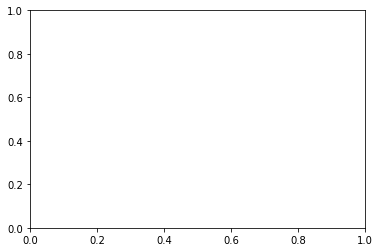

In [347]:
plt.hist(h)

In [ ]:
predict.shape

In [348]:
np.unique(predict).size

30

(array([60., 16., 50., 59.,  2.,  5.,  3., 69.,  2.,  3.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

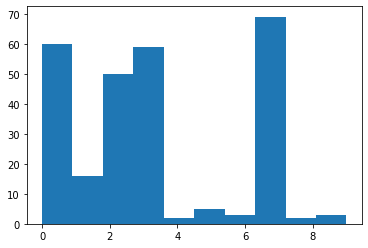

In [94]:
plt.hist(predict, bins=10)

In [4]:
from skimage import io
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color

In [5]:
gold = cv2.imread('gold.jpg')

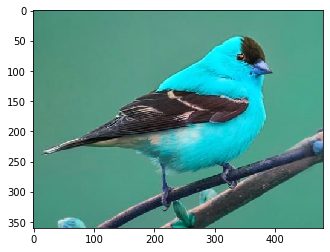

In [18]:
plt.imshow(gold);

In [16]:
image_slic = seg.slic(gold, compactness = 10, n_segments = 10, sigma = 10, enforce_connectivity = True)

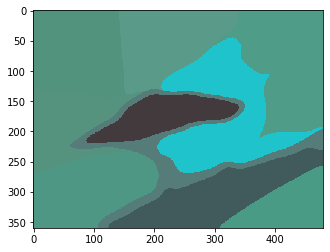

In [17]:
plt.imshow(color.label2rgb(image_slic, gold,kind='avg'))

In [340]:
np.unique(image_slic).size

12

In [19]:
>>> from skimage import data
>>> from skimage.color import rgb2rgbcie
>>> img = data.astronaut()
>>> img_rgbcie = rgb2rgbcie(img)

In [26]:
img_rgbcie[300]

array([[0.10764427, 0.09983327, 0.10926681],
       [0.09586956, 0.07432275, 0.07493785],
       [0.08425521, 0.04293525, 0.03852756],
       ...,
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


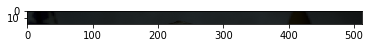

In [28]:
plt.imshow(img_rgbcie[0:20])

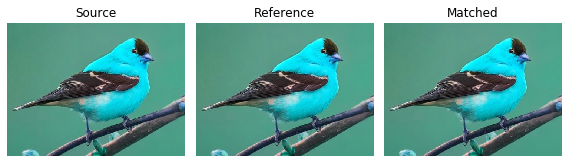

In [37]:
import matplotlib.pyplot as plt

from skimage import data
from skimage import exposure
from skimage.exposure import match_histograms

reference = gold
image = gold

matched = match_histograms(image, reference, multichannel=True)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(image)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()

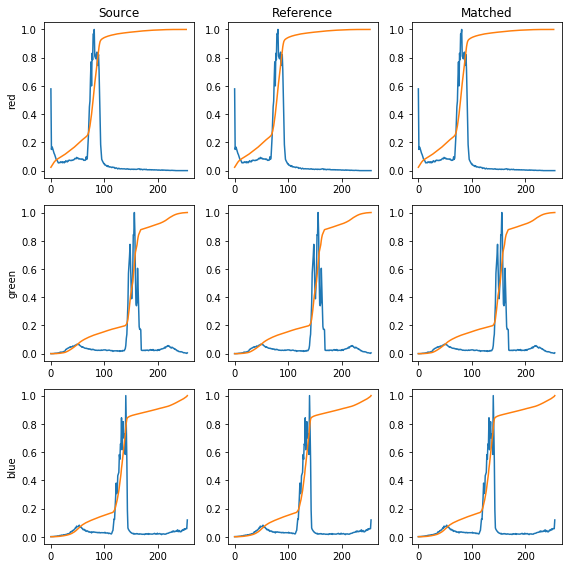

In [38]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))


for i, img in enumerate((image, reference, matched)):
    for c, c_color in enumerate(('red', 'green', 'blue')):
        img_hist, bins = exposure.histogram(img[..., c], source_range='dtype')
        axes[c, i].plot(bins, img_hist / img_hist.max())
        img_cdf, bins = exposure.cumulative_distribution(img[..., c])
        axes[c, i].plot(bins, img_cdf)
        axes[c, 0].set_ylabel(c_color)

axes[0, 0].set_title('Source')
axes[0, 1].set_title('Reference')
axes[0, 2].set_title('Matched')

plt.tight_layout()
plt.show()